# __*Quant Neurobio Final Project*__
- Modelling synaptic pruning during development

Based on work from [Chechik et al., 1998.](https://www-mitpressjournals-org.proxy.lib.duke.edu/doi/pdf/10.1162/089976698300017124)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Synaptic Deletion strategies
- All depend on some arbitrary threshold (t)
- Where z is the total strength of the synaptic connection

#### _Minimal Value Deletion_

In [2]:
def min_val_deletion(z, thresh):
    for i in range(len(z)):
        if np.abs(z[i]) > t:
            z[i] = z[i]
        elif z[i] == t:
            z[i] = 0
        else:
            z[i] = 0
        
    return z

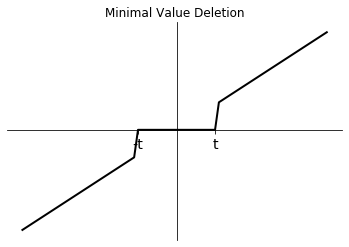

In [3]:
fig = plt.figure()


z = np.arange(-40, 40, 1)
t = 10

min_val_deletion(z, t)


x = np.arange(-40, 40, 1)
y = z

ax = plt.gca()
plt.title('Minimal Value Deletion')
ax.plot(x, y, linewidth = 2, color = 'black')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xticks(ticks = [-t, t], labels = ['-t', 't'], fontsize = 'x-large')
plt.yticks(ticks = []);

#### _Clipping Modification_

In [4]:
def clipping_mod(z, thresh):
    for i in range(len(z)):
        if z[i] > t:
            z[i] = 1
        elif z[i] < -t:
            z[i] = -1
        else:
            z[i] = 0
    return z

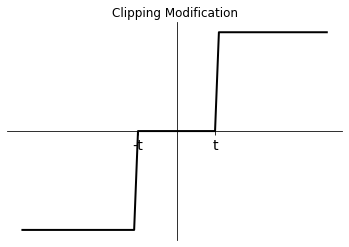

In [5]:
fig = plt.figure()


z = np.arange(-40, 40, 1)
t = 10

clipping_mod(z, t)

x = np.arange(-40, 40, 1)
y = z

ax = plt.gca()
plt.title('Clipping Modification')
ax.plot(x, y, linewidth = 2, color = 'black')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xticks(ticks = [-t, t], labels = ['-t', 't'], fontsize = 'x-large')
plt.yticks(ticks = []);

#### _Compressed Deletion_

In [6]:
def compressed_deletion(z, thresh):
    for i in range(len(z)):
        if np.abs(z[i]) <= t:
            z[i] = 0
        elif z[i] > t:
            z[i] = z[i] - t
        elif z[i] < -t:
            z[i] = z[i] + t
    return z

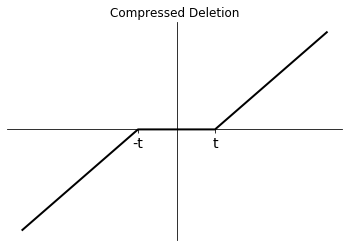

In [7]:
fig = plt.figure()


z = np.arange(-40, 40, 1)
t = 10

compressed_deletion(z,t)

x = np.arange(-40, 40, 1)
y = z

ax = plt.gca()
plt.title('Compressed Deletion')
ax.plot(x, y, linewidth = 2, color = 'black')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xticks(ticks = [-t, t], labels = ['-t', 't'], fontsize = 'x-large')
plt.yticks(ticks = []);

## _Creating a hebbian network to test the different deletion types_

### [Canonical Hopfield Model](https://www.pnas.org/content/79/8/2554)

In [8]:
M = 3 #number of memories
N = 4 #number of neurons

In [47]:
%%time

patterns = np.empty(shape = (M, N))

#create an empty pattern matrix to store all of the original patterns

w = np.empty(shape = (N,N))

#create an empty pattern and connectivity matrix for each pattern

Wij = np.empty(shape = (M, N, N))

#create a larger empty 3D array, that stores the connectivity patterns for each memory

for i in range(M):
    neurons = np.random.choice([-1, 1], N)
    patterns[i][:] = neurons
    for j in range(len(neurons)):
        w[j][:] = neurons[j] * neurons
        for v in range(len(w)):
            w[v][v] = 0
    Wij[i] = w
    
    
#the resulting Wij output represents the initial synaptic efficacy for each pattern (1st dim) for each neuron (2nd dim) and its connectivity matrix (3rd dim)
#all of the original binary memory patterns are stored within the patterns variable

Wall time: 0 ns


In [48]:
print('Patterns matrix size: ', patterns.shape)
print('Initial synaptic efficacy matrix for each memory: ', Wij.shape)

Patterns matrix size:  (3, 4)
Initial synaptic efficacy matrix for each memory:  (3, 4, 4)


In [49]:
Wij

array([[[ 0., -1., -1., -1.],
        [-1.,  0.,  1.,  1.],
        [-1.,  1.,  0.,  1.],
        [-1.,  1.,  1.,  0.]],

       [[ 0.,  1., -1., -1.],
        [ 1.,  0., -1., -1.],
        [-1., -1.,  0.,  1.],
        [-1., -1.,  1.,  0.]],

       [[ 0.,  1., -1., -1.],
        [ 1.,  0., -1., -1.],
        [-1., -1.,  0.,  1.],
        [-1., -1.,  1.,  0.]]])

In [50]:
#creating the initial connectivity matrix by summing across the memories

WIJ = np.zeros(shape = (N, N))

for j in range(N):
    for i in range(N):
        x = []
        for m in range(M):
            x = np.append(x, Wij[m][i][j])
        WIJ[i][j] = (1/np.sqrt(M)) * x.sum()
WIJ

array([[ 0.        ,  0.57735027, -1.73205081, -1.73205081],
       [ 0.57735027,  0.        , -0.57735027, -0.57735027],
       [-1.73205081, -0.57735027,  0.        ,  1.73205081],
       [-1.73205081, -0.57735027,  1.73205081,  0.        ]])

In [51]:
print('Initial synaptic efficacy: ', WIJ.shape)

Initial synaptic efficacy:  (4, 4)


In [52]:
#state update rule

for t in range(timesteps):
    for i in range(N):
        for j in range(N):
            X[t][j] = WIJ[i][j]

In [66]:
WIJ[0]

array([ 0.        ,  0.57735027, -1.73205081, -1.73205081])

In [70]:
#creating the input field for just one neuron i
f = []

for j in range(N):
    f = np.append(f, X[0][0]*WIJ[0][j])
    if f.sum() > 0:
        X[1][0] = 1
    else:
        X[1][0] = -1

In [71]:
X

array([[-1.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [73]:
#ok now lets generalize this function to multiple timesteps, and with every neuron in the network

for t in range(timesteps-1):
    for i in range(N):
        f = []
        for j in range(N):
            f = np.append(f, X[t][i]*WIJ[i][j])
            if f.sum() > 0:
                X[t+1][i] = 1
            else:
                X[t+1][i] = -1

In [74]:
X

array([[-1.,  1.,  1.,  1.],
       [ 1., -1., -1., -1.],
       [-1.,  1.,  1.,  1.],
       [ 1., -1., -1., -1.],
       [-1.,  1.,  1.,  1.],
       [ 1., -1., -1., -1.],
       [-1.,  1.,  1.,  1.],
       [ 1., -1., -1., -1.],
       [-1.,  1.,  1.,  1.],
       [ 1., -1., -1., -1.],
       [-1.,  1.,  1.,  1.],
       [ 1., -1., -1., -1.],
       [-1.,  1.,  1.,  1.],
       [ 1., -1., -1., -1.],
       [-1.,  1.,  1.,  1.]])

In [64]:
#network activity at timestep 1 for neuron 1

X[0][0]

-1.0

In [22]:
#3 memories stored as 4 binary numbers

patterns[1]

array([1., 1., 1., 1.])

In [57]:
#will need to initilize the model with some Xt=0 that is close to one of the patterns, but slightly different with a little bit of noise

timesteps = 15


X = np.zeros(shape = (timesteps, N))

#x is our network's activity pattern, this changes over a certain number of timesteps and represents the value of each of the neurons within the second dim

In [58]:
X[0] = patterns[0]

In [59]:
X[0]

array([-1.,  1.,  1.,  1.])

### Low-activity Model from [Tsodyks and Feigelman 1988](https://www.researchgate.net/profile/Michail_Tsodyks/publication/231147967_The_Enhanced_Storage_Capacity_in_Neural_Networks_with_Low_Activity_Level/links/56ce28a308ae059e37535728/The-Enhanced-Storage-Capacity-in-Neural-Networks-with-Low-Activity-Level.pdf)

In [ ]:
p = 0.1
val = []

for i in range(M):
    val = np.append(val, (np.random.choice([0, 1], 2) - p)*(np.random.choice([0, 1], 2) - p))

In [ ]:
(1/(p*(1-p)*np.sqrt(M))) * val